## Data Wrangling, Visualization and Data Cleaning

In [204]:
import pandas as pd
import numpy as np
import scipy
from matplotlib.legend import Legend
from matplotlib.lines import Line2D
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. Numpy 

### 1.1 Arrays

### slicing, integer, boolean

Returns a __REFERENCE__ to the original array. Shallow copy.

_Slicing_ indexing always keeps the dimension. _Integer_ indexing allows creation of any arbitrary dimension.Think of slicing as "returning a list of arguments that are indexed at..."

In [29]:
# Indexing
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
a

## Integer indexing reduces one dimension. Slicing keeps the original dimension. ##
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r1
row_r1.shape
row_r2

row_r2.shape

# Use reshape to change diemnsion. -1 infers the dimension. 1 keeps only one dimension.
row_r2.reshape(-1)


row_r1[0] = 100
a
row_r2

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

array([5, 6, 7, 8])

(4,)

array([[5, 6, 7, 8]])

(1, 4)

array([5, 6, 7, 8])

array([[  1,   2,   3,   4],
       [100,   6,   7,   8],
       [  9,  10,  11,  12]])

array([[100,   6,   7,   8]])

In [30]:
# integer array indexing allows you to construct arbitrary arrays using the data from another array
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)
b = np.array([0, 2, 0, 1])
# Select different elements from each row.
print(a[np.arange(4), b])  

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[ 1  6  7 11]


In [34]:
# Boolean indexing is just like integer indexing. It reduces dimensions. One useful example:
print(a > 3)
a[a > 3]

# Keep in mind this is a reference. So it can be used to mutate the data.
a
a[a> 10] = 300
a

[[False False False]
 [ True  True  True]
 [ True  True  True]
 [ True  True  True]]


array([ 4,  5,  6,  7,  8,  9, 10, 11, 12])

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12]])

array([[  1,   2,   3],
       [  4,   5,   6],
       [  7,   8,   9],
       [ 10, 300, 300]])

### Data type

In [36]:
x = np.array([1, 2], dtype=np.int64)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

x = np.array([1, 2], dtype=np.double)   # Force a particular datatype
print(x.dtype)                         # Prints "int64"

int64
float64


### Arithmetics

In [43]:
# Matrix product vs elementwise
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

np.multiply(x,y)
np.dot(x,y)

# Row sums and column sums.
np.sum(x)
np.sum(x, axis = 0)
np.sum(x, axis = 1)

# Transpose
x.T

array([[ 5, 12],
       [21, 32]])

array([[19, 22],
       [43, 50]])

10

array([4, 6])

array([3, 7])

array([[1, 3],
       [2, 4]])

### Broadcasting

Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array. This is broadcasting.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
1. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
1. The arrays can be broadcast together if they are compatible in all dimensions.
1. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
1. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

See the set of universal functions here:https://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs

In [49]:
## Actual implementation:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
y  # Prints "[[ 2  2  4]
          #          [ 5  5  7]
          #          [ 8  8 10]
          #          [11 11 13]]"
            
# Or we could just do 
x + np.array([1,0,1])

# Some other applications: 
np.mod(x, np.array([2,4,8]))
np.power(x, np.array([1,2,3]))

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

array([[ 2,  2,  4],
       [ 5,  5,  7],
       [ 8,  8, 10],
       [11, 11, 13]])

array([[1, 2, 3],
       [0, 1, 6],
       [1, 0, 1],
       [0, 3, 4]], dtype=int32)

array([[   1,    4,   27],
       [   4,   25,  216],
       [   7,   64,  729],
       [  10,  121, 1728]], dtype=int32)

### pdist from _scipy_

In [50]:
from scipy.spatial.distance import pdist, squareform

# Create the following array where each row is a point in 2D space:
# [[0 1]
#  [1 0]
#  [2 0]]
x = np.array([[0, 1], [1, 0], [2, 0]])
print(x)

# Compute the Euclidean distance between all rows of x.
# d[i, j] is the Euclidean distance between x[i, :] and x[j, :],
# and d is the following array:
# [[ 0.          1.41421356  2.23606798]
#  [ 1.41421356  0.          1.        ]
#  [ 2.23606798  1.          0.        ]]
d = squareform(pdist(x, 'euclidean'))
print(d)

[[0 1]
 [1 0]
 [2 0]]
[[0.         1.41421356 2.23606798]
 [1.41421356 0.         1.        ]
 [2.23606798 1.         0.        ]]


## 2. Matplotlib.pyplot

### 2.1 Short version

The logic is simple: 
    
1. get (x,y) value pairs for each line.
1. call plt.plot(x=, y=) on each list of (x,y) pairs.
1. x,y axis label, title, and legend for different lines. Adding legend is very simple here.

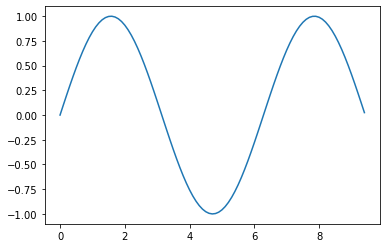

In [52]:
import matplotlib.pyplot as plt

# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()  # You must call plt.show() to make graphics appear.

Text(0.5, 0, 'x axis label')

Text(0, 0.5, 'y axis label')

Text(0.5, 1.0, 'Sine and Cosine')

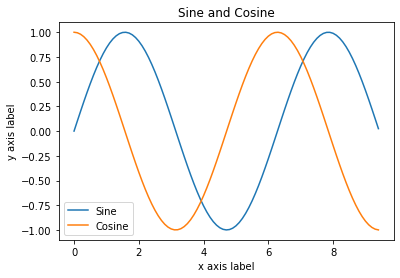

In [53]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib.
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

Subplots are also easy. Just add the step of setting subplot active.

Text(0.5, 1.0, 'Sine')

Text(0.5, 1.0, 'Cosine')

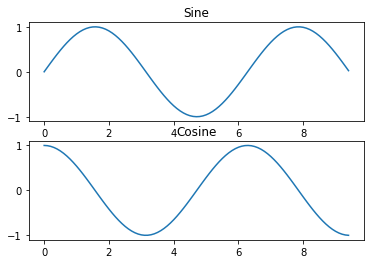

In [56]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')


# Show the figure.
plt.show()

### Official Version (Recommended)

https://matplotlib.org/tutorials/introductory/pyplot.html

#### Basics

Workflow:

1. Prcoess Data
2. Create a figure, then add subplots.
3. Plot & Customize. Either use the assigned ax to plot or use subplot(nrow, ncol, index) to activate.

Text(0, 0.5, 'some numbers')

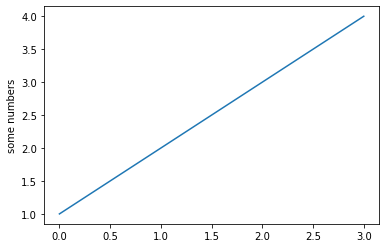

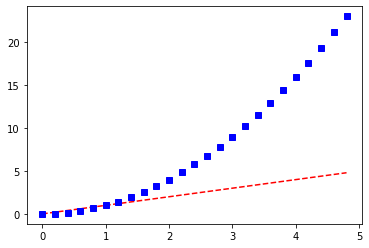

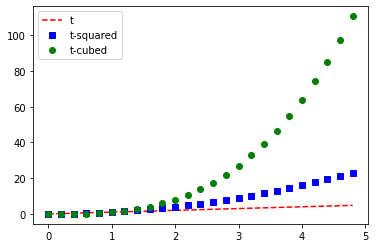

In [71]:
import matplotlib.pyplot as plt

# The quickest way to generate meaningful plots is with plt.plot(x, y, style). 
# "b-" is blue solid line, 
# "ro" is red circles. 
# "^" is triangle 
# "s" is squares
# "--" is dashed lines.
t = np.arange(0., 5., 0.2)

plt.plot(t, t, "r--")
plt.plot(t, t**2, "bs")
plt.plot(t, t**3, "go")
plt.legend(['t','t-squared', 't-cubed'])
plt.show()

<span style="color:red"> Why does matlibplot allow this resetting ncol&nrow functionality?

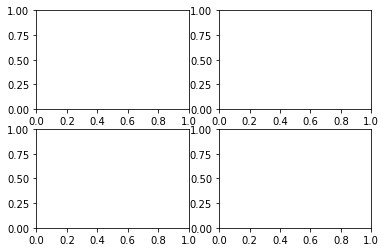

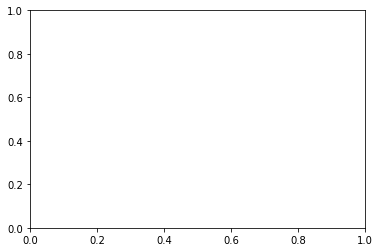

In [90]:
# Add_subplot gives the option of resetting the number of axes and columns every time. 
# Be careful with this option. Set consistent numbers.
fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)


fig2 = plt.figure()
ax2_1 = fig2.add_subplot(1,1,1)
plt.show()

Observation: marker size defines the area of marker, which visually shrinks difference in data. If we want the diameter proportion (instead of area proportion) to reflect difference, we can use <span style="color:gold"> __squard (higher power) attribute__ </span> to define the area.

Also with matplotlib, add_subplot returns axes, and axes.scatter() returns a plot. __These plot objects catpure all features, not axes.__

array([ 60.15890849,  45.98881608,  93.13553893,  86.15184107,
        66.63734011,  52.87567182,  54.66847975,  98.0315509 ,
       112.83799312,  58.07105593,  77.40033351,  88.29195853,
       114.55973872,  65.78470227,  60.13786181,  89.941234  ,
        74.14726872,  69.89295952,  98.69521046,  87.26506958,
        77.23922438, 103.49209052,  53.87080986,  68.64578122,
        80.50947141,  70.88905803, 102.78467335,  83.18500632,
       118.61857968,  61.31197745,  82.87641846,  92.89442141,
        73.69525661,  99.9454483 , 105.89495042,  63.49196155,
        59.75447238,  71.0336968 ,  59.2169263 ,  74.35088799,
        82.68386734,  53.39416416,  68.44950949,  70.81442182,
        72.83891049,  75.84889919,  64.07838539,  87.63549358,
        52.1218752 ,  60.31328706])

[Text(0, 0.5, 'attractedNess'), Text(0.5, 0, 'effort')]

Text(0.5, 1.0, "How a guy's effort, weight and height affect his girlfriend's attraction to him")

[Text(0, 0.5, 'attractedNess'), Text(0.5, 0, 'effort')]

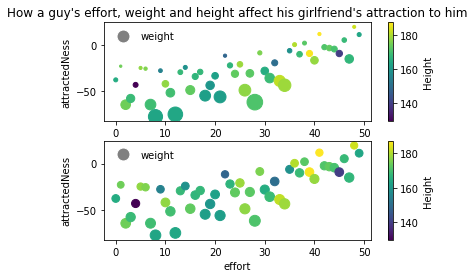

In [208]:
## A scatter plot that captures 4 diemnsions. plt.scatter(x, y, c=, s=) c is color, s is marker size.
data = {'effort' : np.arange(50),
       'height': np.random.normal(171,10,50),
        'weight':  np.random.normal(75,20,50)
       }
data['attractedNess'] = data['effort']  + data['height'] * 0.1 - data['weight'] * 0.9

fig3 = plt.figure()

weights = np.array([70,80,90])

data['weight']

## Amplifying the difference by using cubed data to set marker size.
ax1_fig3 = fig3.add_subplot(2,1,1)
plot1 = ax1_fig3.scatter('effort', 'attractedNess', c = 'height', s = (data['weight']/30)**4, data = data)
ax1_fig3.set(xlabel="effort",ylabel="attractedNess")
plt.colorbar(plot1, label="Height")
plt.title("How a guy's effort, weight and height affect his girlfriend's attraction to him")
## We can't directly add a legend for size. 

legend_elements = []
legend_elements.append(Line2D([0], [0], marker='o', color='w', label="weight",
                          markerfacecolor='grey', markersize=(i/25)**2))
ax1_fig3.legend(handles=legend_elements, loc="upper left", frameon=0)


ax2_fig3 = fig3.add_subplot(2,1,2)
plot2 = ax2_fig3.scatter('effort', 'attractedNess', c = 'height', s = data['weight'], data = data)
ax2_fig3.set(xlabel="effort",ylabel="attractedNess")
plt.colorbar(plot2, label="Height")
ax2_fig3.legend(handles=legend_elements, loc="upper left", frameon=0)
plt.show()

## 3. Pandas